<center>
    <h1> Unit 10 Homework</h1>
    <h2> W203 Statistics for Data Science </h2>
</center>

Student Name: Suhas Gupta

Section Number: 7

** Context: ** Recall that the slope coefficient in a simple regression of $Y_i$ on $X_i$ can be expressed as,

$$ \beta_1 = \frac{\hat{cov}(X_i, Y_i)}{\hat{var}(X_i)}$$

Suppose that you were to add a random variable, $M_i$, representing measurement error, to each $X_i$.  You may assume that $M_i$ is uncorrelated with both $X_i$ and $Y_i$.  You then run a regression of $Y_i$ on $X_i + M_i$ instead of on $X_i$.  Does the measurement error increase or decrease your slope coefficient?



**Data: ** The file bwght.RData contains data from the 1988 National Health Interview Survey.  It was used by J Mullahy for a 1997 paper (“Instrumental-Variable Estimation of Count Data Models:  Applications to Models of Cigarette Smoking Behavior,” Review of Economics and Statistics 79, 596-593.) and provide by Wooldridge.  You will use this data to examine the relationship between cigarette smoking and a child's birthweight.

 <span style="color:blue">
    Addition of uncorrelated random variable to each $X_i$ will **decrease* the slope coefficient of linear regression model.
    </span>

In [22]:
load("bwght.RData")
nrow(data)
summary(data)

[1] 1388

     faminc          cigtax         cigprice         bwght      
 Min.   : 0.50   Min.   : 2.00   Min.   :103.8   Min.   : 23.0  
 1st Qu.:14.50   1st Qu.:15.00   1st Qu.:122.8   1st Qu.:107.0  
 Median :27.50   Median :20.00   Median :130.8   Median :120.0  
 Mean   :29.03   Mean   :19.55   Mean   :130.6   Mean   :118.7  
 3rd Qu.:37.50   3rd Qu.:26.00   3rd Qu.:137.0   3rd Qu.:132.0  
 Max.   :65.00   Max.   :38.00   Max.   :152.5   Max.   :271.0  
                                                                
    fatheduc        motheduc         parity           male       
 Min.   : 1.00   Min.   : 2.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:12.00   1st Qu.:12.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :12.00   Median :12.00   Median :1.000   Median :1.0000  
 Mean   :13.19   Mean   :12.94   Mean   :1.633   Mean   :0.5209  
 3rd Qu.:16.00   3rd Qu.:14.00   3rd Qu.:2.000   3rd Qu.:1.0000  
 Max.   :18.00   Max.   :18.00   Max.   :6.000   Max.   :1.0000  
 NA's   :196     N

**1.0** Examine the dependent variable, infant birth weight in ounces (bwght) and the independent variable, the number of cigarettes smoked by the mother each day during pregnacy (cigs).

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   23.0   107.0   120.0   118.7   132.0   271.0 

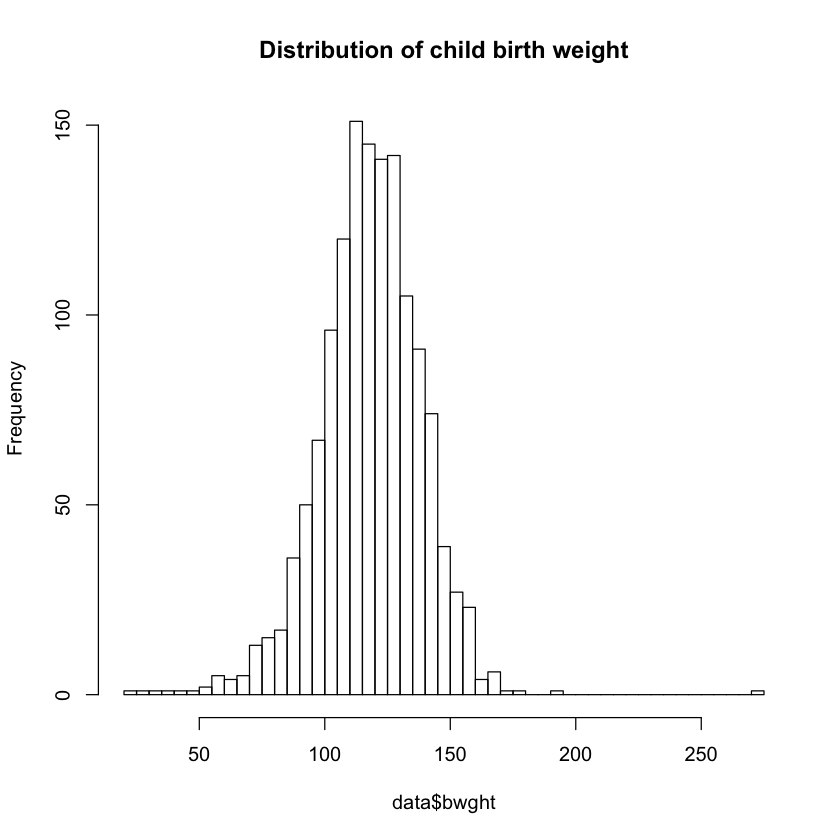

In [4]:
summary(data$bwght)
hist(data$bwght,breaks=50, main='Distribution of child birth weight')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   2.087   0.000  50.000 

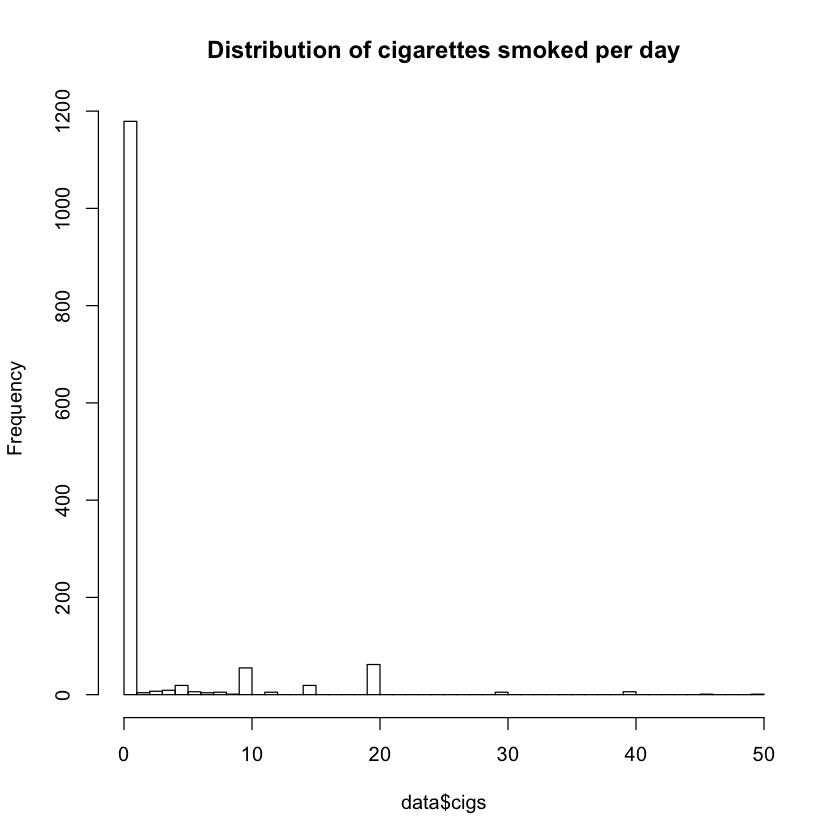

In [6]:
summary(data$cigs)
hist(data$cigs,breaks=50, main='Distribution of cigarettes smoked per day')

<span style="color:blue">
    The number of cigarettes smoked per day appears to have a large positive skew with the minimum value starting at zero. This data is understandable since the expected value of cigarettes smoked by pregnant women is zero given the known health risks. 
    </span>

** 2.0 ** Fit a linear model that predicts bwght as a function of cigs.  Superimpose your regression line on a scatterplot of your variables.

In [53]:
Y = data$bwght
X = data$cigs
model1 = lm(Y ~ X, data=data)
beta1 = model1$coefficients[2]
beta0 = model1$coefficient[1]

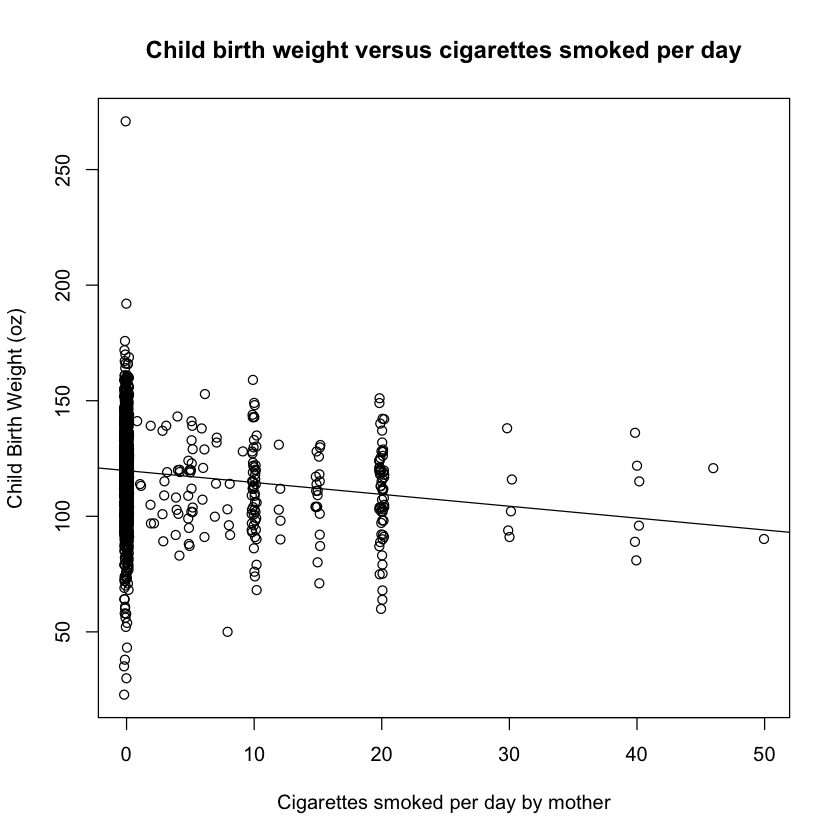

In [54]:
plot(jitter(Y) ~ jitter(X), main="Child birth weight versus cigarettes smoked per day", 
     xlab = "Cigarettes smoked per day by mother",
     ylab = "Child Birth Weight (oz)")
abline(model1)

** 3.0 ** Examine the coefficients of your fitted model.  Explain, in particular, how to interpret the slope coefficient on cigs.  Is it practically significant?

<span style="color:blue"> 
    Intercept coefficient is the value for child weight when cigrattes smoked per day by the mother is zero during preganancy. This value is 119.79 in the fitted model above. This value is very close to the mean & median of the sample data and makes sense since we expect the weigth of the child to be close to the mean when the value of dependant variable is zero.
</span>

<span style='color:blue'>
    The slope coefficient gives the linear relationship between bwght and cigs variables holding the other factors fixed. Our fitted model has a negative slope coefficient of 0.5138 which indicates that for unit increase in number of cigarettes smoked per day by the mother, the birth weight of infant decreases by 0.5138 ounces. 
</span>

** 4.0** Write down the two moment conditions for this regression.  Use R to verify that they hold for your fitted model.

$$
E[u] = 0 \;\;\;\;\;\; \text{ and } \;\;\;\;\;\; 
    cov(X, u) \equiv E[Xu] - E[X]E[u] =   0.
$$

In [55]:
u_hat = Y - beta0 - beta1 * X
mean(u_hat)

[1] 1.609967e-13

In [56]:
cov(X,u_hat)

[1] 3.902738e-13

** 5.0** Does this simple regression capture a causal relationship between smoking and birthweight?  Explain why or why not.

<span style="color:blue">
    No, this model only captures a linear relationnship derived from covariance and variance of the dependant and independant variables in the sample data. This model provides the change in value dependant variable for a given change in value of the independant variable. The slope coefficient in the model equation gives the change in y based on x holding other factors constant. However, since we do not know anything about the other factors from this simple regression model, we cannot draw a causality conclusion from this model. 
    </span>

** 6.0** Does your scatterplot show evidence of measurement error in cigs?  If so, what does this say about the true relationship between cigarettes and birthweight?

<span style="color:blue">
    It is not possible to say from the scatterplot that there is measurement error in the sample data. There is clustering of Y values for certain values of X which may be the result of other variables that haven't been considered in the simple regression model. 
    </span>

<span style="color:blue">
The scatter plot indicates that the true relationship between birth weight and cigarettes is not accurately represented by the simple regression model we used above. 
</span>

** 7.0** Using your coefficients, what is the predicted birthweight when cigs is 0?  When cigs is 20?

In [57]:
cig_values = c(0,20)
bwght_values = beta0  + beta1 * cig_values
sprintf("Birthweight(oz) when cigs=0 : %f", bwght_values[1])
sprintf("Birthweight(oz) when cigs=20 : %f", bwght_values[2])

[1] "Birthweight(oz) when cigs=0 : 119.771900"

[1] "Birthweight(oz) when cigs=20 : 109.496459"

** 8.0** Use R's predict function to verify your previous answers.  You may insert your linear model object into the command below.

In [79]:
model1 = lm(bwght ~ cigs, data=data)
cig_data = data.frame(cigs=c(0,20))
predict(model1, newdata = cig_data)

1        2 
119.7719 109.4965

** 9.0** To predict a birthweight of 100 ounces, what would cigs have to be?

[1] "Value of cigs required to predict birthweight=100oz: 38"

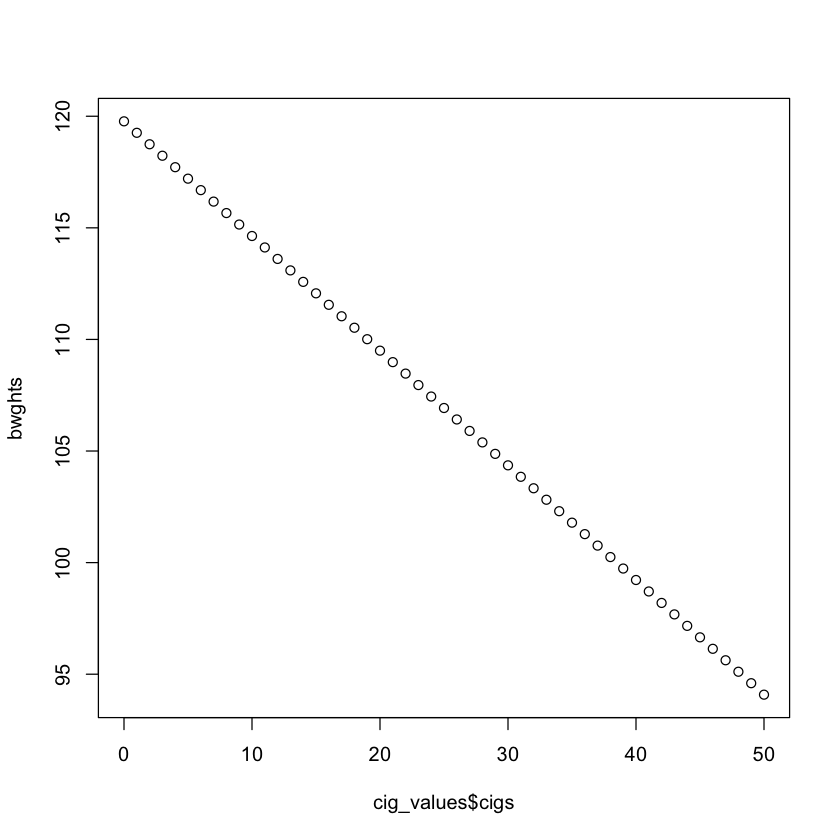

In [88]:
cig1 = floor((100 - beta0)/beta1)
sprintf("Value of cigs required to predict birthweight=100oz: %d", cig1)
cig_values = data.frame(cigs=c(0:50))
bwghts = predict(model1, newdata=cig_values)
plot(cig_values$cigs,bwghts)